In [1]:
# 📥 STEP 1: Upload Dataset (Kaggle file)
from google.colab import files
uploaded = files.upload()


Saving symbols_valid_meta.csv to symbols_valid_meta.csv


In [2]:
# 📦 STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 📄 STEP 3: Load Dataset
# Replace 'your_file.csv' with actual filename, e.g., 'stocks.csv'
df = pd.read_csv('symbols_valid_meta.csv')
print(df.columns)
df.head()


Index(['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange',
       'Market Category', 'ETF', 'Round Lot Size', 'Test Issue',
       'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares'],
      dtype='object')


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [3]:
# 🧹 STEP 4: Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure 'Close' column exists
if 'Close' not in df.columns:
    raise Exception("Dataset must include a 'Close' column.")

data = df[['Close']].values

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 📊 STEP 5: Create Sequences
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


KeyError: 'Date'

In [4]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 📄 Load and Inspect Dataset
df = pd.read_csv('symbols_valid_meta.csv')
print("Original Columns:", df.columns)
df.columns = df.columns.str.strip().str.lower()
print("Normalized Columns:", df.columns)

# 🧹 Preprocessing
if 'close' not in df.columns:
    raise Exception("The dataset must include a 'close' column for stock prices.")
if 'date' not in df.columns:
    raise Exception("The dataset must include a 'date' column.")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

data = df[['close']].values

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 📊 Prepare Data for LSTM
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape for LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 🧠 Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 🔮 Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 🧮 Evaluate Model
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 📈 Visualization
plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Original Columns: Index(['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange',
       'Market Category', 'ETF', 'Round Lot Size', 'Test Issue',
       'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares'],
      dtype='object')
Normalized Columns: Index(['nasdaq traded', 'symbol', 'security name', 'listing exchange',
       'market category', 'etf', 'round lot size', 'test issue',
       'financial status', 'cqs symbol', 'nasdaq symbol', 'nextshares'],
      dtype='object')


Exception: The dataset must include a 'close' column for stock prices.

In [5]:
# 🔐 Upload kaggle.json API key
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"apurbobiswas23","key":"54541e14c169788db2b5f0e74706a09a"}'}

In [6]:
# 📂 Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
# ⬇️ Download dataset
!kaggle datasets download -d jacksoncrow/stock-market-dataset

# 📦 Unzip it
!unzip stock-market-dataset.zip



Streaming output truncated to the last 5000 lines.
  inflating: stocks/CAPL.csv         
  inflating: stocks/CAPR.csv         
  inflating: stocks/CAR.csv          
  inflating: stocks/CARA.csv         
  inflating: stocks/CARE.csv         
  inflating: stocks/CARG.csv         
  inflating: stocks/CARO.csv         
  inflating: stocks/CARR#.csv        
  inflating: stocks/CARS.csv         
  inflating: stocks/CARV.csv         
  inflating: stocks/CASA.csv         
  inflating: stocks/CASH.csv         
  inflating: stocks/CASI.csv         
  inflating: stocks/CASS.csv         
  inflating: stocks/CASY.csv         
  inflating: stocks/CAT.csv          
  inflating: stocks/CATB.csv         
  inflating: stocks/CATC.csv         
  inflating: stocks/CATM.csv         
  inflating: stocks/CATO.csv         
  inflating: stocks/CATS.csv         
  inflating: stocks/CATY.csv         
  inflating: stocks/CB.csv           
  inflating: stocks/CBAN.csv         
  inflating: stocks/CBAT.csv         

In [8]:
import os
files = os.listdir()
print(files)



['.config', 'kaggle.json', 'symbols_valid_meta.csv', 'etfs', 'stocks', 'drive', 'stock-market-dataset.zip', 'sample_data']


In [9]:
import os
os.listdir("stocks")



['RYAM.csv',
 'UIS.csv',
 'AZN.csv',
 'DORM.csv',
 'OMER.csv',
 'HAFC.csv',
 'M.csv',
 'IRET.csv',
 'PEBK.csv',
 'DRRX.csv',
 'SF.csv',
 'ORN.csv',
 'RCA.csv',
 'LAIX.csv',
 'MUS.csv',
 'OFS.csv',
 'REPH.csv',
 'LUB.csv',
 'RNWK.csv',
 'CPE.csv',
 'HONE.csv',
 'PKE.csv',
 'MDIA.csv',
 'CDNS.csv',
 'OMP.csv',
 'PMF.csv',
 'AEG.csv',
 'MOD.csv',
 'TUES.csv',
 'VVPR.csv',
 'IEC.csv',
 'BSA.csv',
 'BEP.csv',
 'SWKH.csv',
 'HSBC.csv',
 'MCB.csv',
 'EFF.csv',
 'APDN.csv',
 'HHT.csv',
 'DBVT.csv',
 'SRCE.csv',
 'TCRR.csv',
 'BSTZ.csv',
 'BBK.csv',
 'DTIL.csv',
 'MBINO.csv',
 'HGV.csv',
 'NLS.csv',
 'SIBN.csv',
 'CLR.csv',
 'SFTW.csv',
 'OBAS.csv',
 'FUN.csv',
 'TLYS.csv',
 'WDAY.csv',
 'AGO.csv',
 'LAKE.csv',
 'RMI.csv',
 'MCX.csv',
 'CNST.csv',
 'FVE.csv',
 'RNR.csv',
 'PHX.csv',
 'ATRO.csv',
 'IAC.csv',
 'TCI.csv',
 'YTEN.csv',
 'JJA.csv',
 'MUR.csv',
 'HTLF.csv',
 'HWCPL.csv',
 'CBH.csv',
 'RQI.csv',
 'CORR.csv',
 'HRTG.csv',
 'LMNR.csv',
 'BPOPM.csv',
 'ARLP.csv',
 'RJZ.csv',
 'MPA.csv',


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 2.0056e-04
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 1.0952e-05
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 1.0547e-05
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - loss: 9.4785e-06
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - loss: 9.1696e-06
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 7.8889e-06
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 6.5854e-06
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 6.0763e-06
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 5.5013e-06
Epoch 10/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 5.3621e-06
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
RMSE: 8.169597286445006


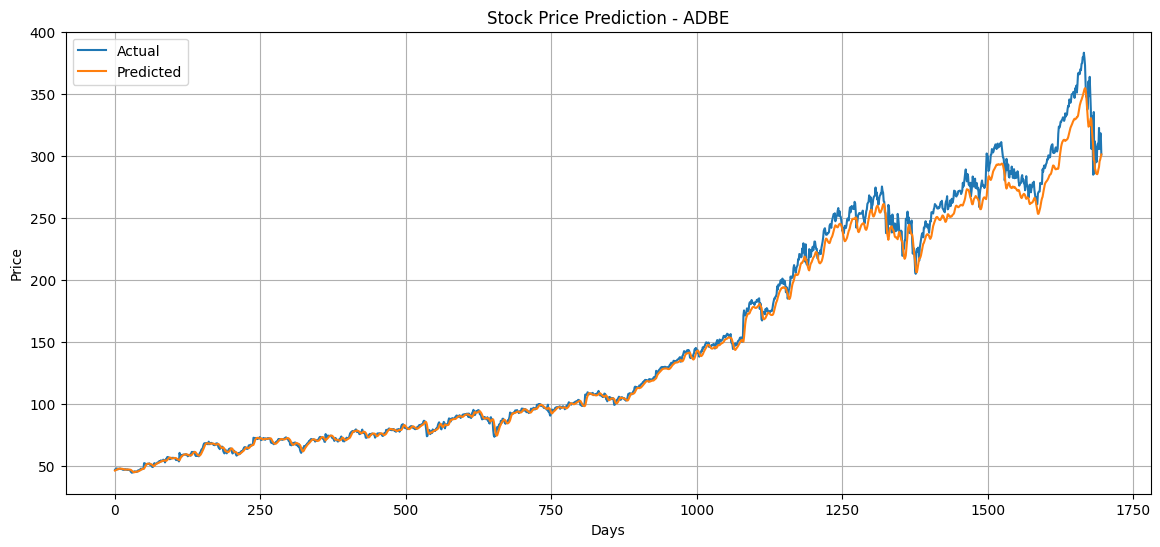

In [10]:
# 🧠 LSTM Stock Price Prediction on ADBE.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the file
df = pd.read_csv("stocks/ADBE.csv")  # adjust if path is different
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use 'Close' price
data = df[['Close']].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split into train/test
train_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_len]
test_data = scaled_data[train_len - 60:]

# Sequence function
def create_dataset(dataset, step=60):
    X, y = [], []
    for i in range(step, len(dataset)):
        X.append(dataset[i-step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# RMSE Evaluation
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse}")

# 📈 Plot results
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("Stock Price Prediction - ADBE")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


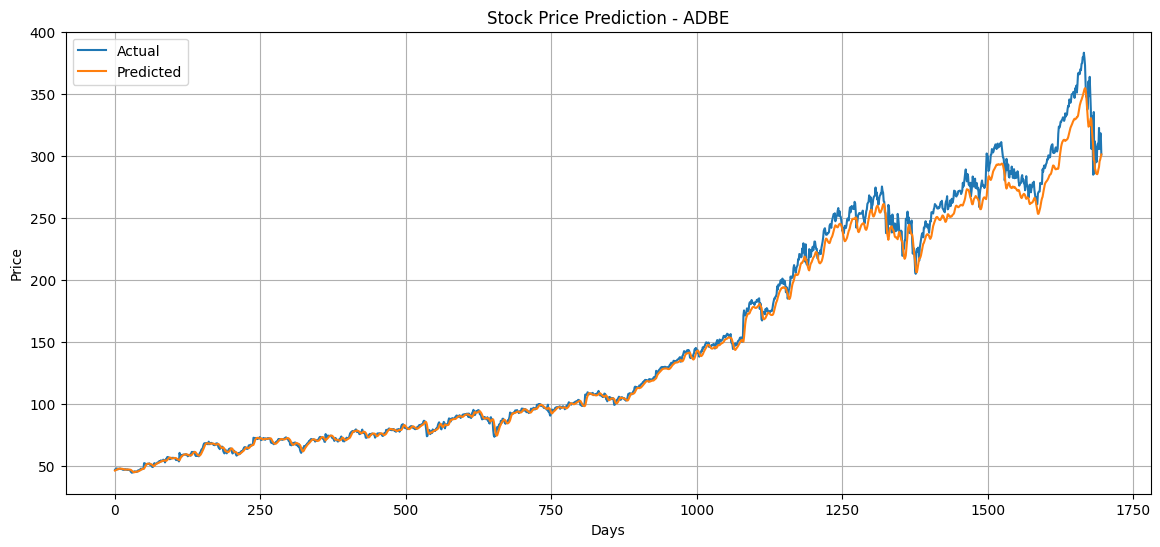

In [11]:
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("Stock Price Prediction - ADBE")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.savefig("adbe_prediction_plot.png")
